# Part A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Understanding & Exploration

1.A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [2]:
Churn_1 = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Ensemble Methods\TelcomCustomer-Churn_1.csv')

In [3]:
Churn_1.shape

(7043, 10)

1.B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [4]:
Churn_2 = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Ensemble Methods\TelcomCustomer-Churn_2.csv')

In [5]:
Churn_2.shape

(7043, 12)

1.C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
Churn = pd.merge(Churn_1, Churn_2, how="inner", on="customerID")

In [7]:
Churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

1.D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [8]:
print(Churn.shape)
print(Churn_1.shape)
print(Churn_2.shape)

(7043, 21)
(7043, 10)
(7043, 12)


In [9]:
Churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
Churn_1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [11]:
Churn_2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
list(Churn.columns) == list(Churn_1.columns) + list(Churn_2.drop(columns="customerID"))

True

Conclusion: All the columns are present in the merged dataframe. Number of rows and columns are preserved post merging.

2. Data Cleaning & Analysis

2.A. Impute missing/unexpected values in the DataFrame

In [13]:
# Print unique values in every column
for column in Churn.columns:
    print(column,"-", Churn[column].unique())

customerID - ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank tr

In [14]:
# Remove "automatic" word from the PaymentMethod values 
Churn['PaymentMethod'] = Churn['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [15]:
Churn['PaymentMethod'].value_counts()

Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: PaymentMethod, dtype: int64

In [16]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Conclusion: No missing or unexpected values

2.B. Make sure all the variables with continuous values are of ‘Float’ type

In [17]:
Churn['TotalCharges'] = pd.to_numeric(Churn['TotalCharges'], errors='coerce')

In [18]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# drop all null values
Churn.dropna(inplace=True)

2.C.  Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the 
pie-chart

In [20]:
def plot_categorical_features(df):
    cat_features = df.select_dtypes(include=['object', 'category']).columns
    for feature in cat_features:
        values = df[feature].value_counts(normalize=True)
        fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
        ax.pie(values, labels=values.index, autopct='%1.1f%%')
        ax.set_title(f"Percentage distribution of {feature}")
        plt.show()

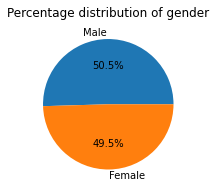

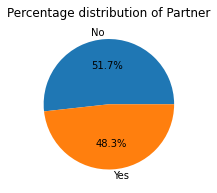

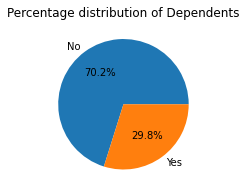

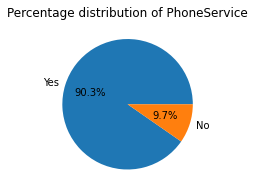

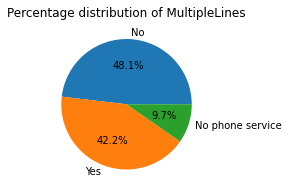

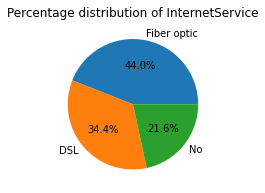

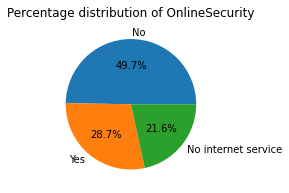

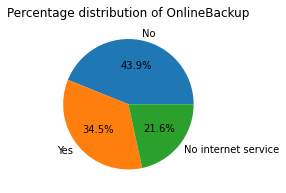

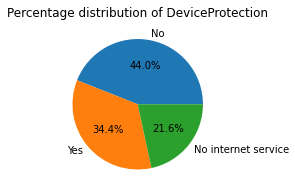

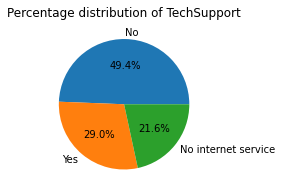

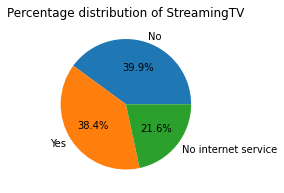

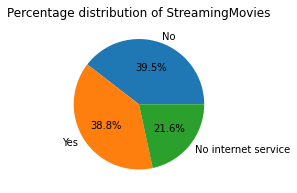

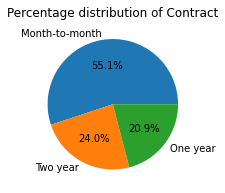

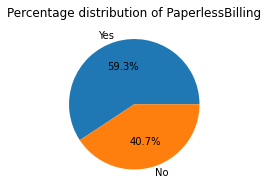

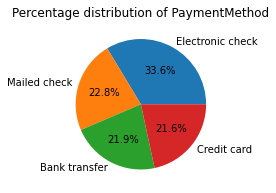

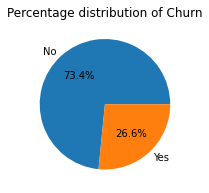

In [21]:
plot_categorical_features(Churn.drop(columns="customerID"))

2.D. Share insights for Q2.c

Demography: Gender and Partner variables are almost equally distributed between the two categories whereas Dependents variable is not equally distributed where 70.2% of them have no dependents.

Customer Account: Majority of people opt for month-to-month contract and paperless billing (55.1% and 59.3% respectively). Payment method is almost equally distributed except electronic check which is 33.6% (maximum).

Services: 90.3% of the people have phone service and only 42.2% have multiple lines. Fiber optic is the most preferred internet service (44%). Majority have no online security, backup, device protection and tech support (49.7%, 43.9%, 44% and 49.4% respectively). The proportion of people who are streaming TV and movies are almost same (38.4% and 38.8% respectively).

Response variable: This is an imbalanced dataset with 73.4% as No Churn while remaining 26.6% as Yes

2.E. Encode all the appropriate Categorical features with the best suitable approach

In [22]:
# Label encoding for binary variables

Churn_encode = Churn.copy()

Columns_label_encoding = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in Columns_label_encoding:
    if column == 'gender':
        Churn_encode[column] = Churn_encode[column].map({'Female': 1, 'Male': 0})
    else: 
        Churn_encode[column] = Churn_encode[column].map({'Yes': 1, 'No': 0})

In [23]:
Churn_encode.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
# One-hot encoding for columns that have more than 2 categories

Columns_one_hot_encoding = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

Churn_encode = pd.get_dummies(Churn_encode, columns = Columns_one_hot_encoding)

In [25]:
Churn_encode.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


2.G. Normalize/Standardize the data with the best suitable approach

In [26]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in columns:
        min_column = Churn_encode[column].min()
        max_column = Churn_encode[column].max()
        Churn_encode[column] = (Churn_encode[column] - min_column) / (max_column - min_column)

In [27]:
Churn_encode.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,0.000000,0,1,0.115423,0.001275,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,0.464789,1,0,0.385075,0.215867,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,0.014085,1,1,0.354229,0.010310,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,0.619718,0,0,0.239303,0.210241,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,0.014085,1,1,0.521891,0.015330,...,1,0,0,1,0,0,0,0,1,0


2.F. Split the data into 80% train and 20% test

In [28]:
X = Churn_encode.drop(columns=["Churn", "customerID"]) 
y = Churn_encode.loc[:, "Churn"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

*Please note that I have done normalization first before splitting the data into train and test

3.A. Train a model using XGBoost. Also print best performing parameters along with train and test performance

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the model
model = xgb.XGBClassifier(random_state=0)
model.fit(X_train, y_train)

# Make predictions on the train and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the performance on training data
acc_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)

# Print the results for training data
print("Accuracy_Train: ", acc_train)
print("Precision_Train: ", precision_train)
print("Recall_Train: ", recall_train)
print("F1 Score_Train: ", f1_train)
print("AUC_Train: ", auc_train)

# Evaluate the performance on test data
acc_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)

# Print the results for test data
print("\nAccuracy_Test: ", acc_test)
print("Precision_Test: ", precision_test)
print("Recall_Test: ", recall_test)
print("F1 Score_Test: ", f1_test)
print("AUC_Test: ", auc_test)

Accuracy_Train:  0.9409777777777778
Precision_Train:  0.9117013639626705
Recall_Train:  0.8586883029073699
F1 Score_Train:  0.8844011142061282
AUC_Train:  0.9145105769240177

Accuracy_Test:  0.7768301350390903
Precision_Test:  0.6194968553459119
Recall_Test:  0.5051282051282051
F1 Score_Test:  0.5564971751412429
AUC_Test:  0.6930754103320474


3.B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance

In [31]:
from sklearn.model_selection import GridSearchCV

# Tune the hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [100, 200, 500]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best hyperparameters to train the final model
model = xgb.XGBClassifier(random_state=0, **grid_search.best_params_)
model.fit(X_train, y_train)

# Make predictions on the train and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model performance for training data
acc_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
auc_train = roc_auc_score(y_train, y_pred_train)

# Print the results for training data
print("Best parameters: ", grid_search.best_params_)
print("\nAccuracy_Train: ", acc_train)
print("Precision_Train: ", precision_train)
print("Recall_Train: ", recall_train)
print("F1 Score_Train: ", f1_train)
print("AUC_Train: ", auc_train)

# Evaluate the model performance for test data
acc_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, y_pred_test)

# Print the results for test data
print("\nAccuracy_Test: ", acc_test)
print("Precision_Test: ", precision_test)
print("Recall_Test: ", recall_test)
print("F1 Score_Test: ", f1_test)
print("AUC_Test: ", auc_test)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Accuracy_Train:  0.8220444444444445
Precision_Train:  0.7035775127768313
Recall_Train:  0.5584854631507775
F1 Score_Train:  0.6226912928759895
AUC_Train:  0.7372745694914524

Accuracy_Test:  0.7974413646055437
Precision_Test:  0.6779661016949152
Recall_Test:  0.5128205128205128
F1 Score_Test:  0.583941605839416
AUC_Test:  0.7097042583768247


# Part B

In [33]:
# Importing all the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pickle

In [34]:
# Load data from the given file path and return as a Pandas DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [35]:
# Handle missing values in the DataFrame by replacing with the mean for numerical variables else drop those rows
def handle_missing_values(df):
    numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_vars] = df[numerical_vars].fillna(df[numerical_vars].mean(numeric_only=True))
    df.dropna(inplace=True)
    return df

In [36]:
# Normalize the DataFrame except the target column
def normalize_data(df):
    # Select only the numerical columns excluding the target column
    numerical_features = df.select_dtypes(include=[np.number]).columns
    excluded_column = ['target']
    selected_columns = [col for col in numerical_features if col not in excluded_column]
    df_numerical = df[selected_columns]
    
    # Normalize the numerical data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerical)
    df_numerical = pd.DataFrame(df_scaled, columns=selected_columns)
    
    # Combine the numerical and non-numerical data
    df_normalized = pd.concat([df_numerical, df.drop(selected_columns, axis=1)], axis=1)
    
    return df_normalized

In [37]:
# Encode the categorical variables using one-hot encoding
def encoding(df):
    categorical_cols = df.select_dtypes(include=['object']).columns

    # One-hot encoding
    df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

    return df

In [38]:
# Train and evaluate several base models and return the best one
def train_base_models(X, y):
    models = [
        LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        GaussianNB(),
        GradientBoostingClassifier()
    ]
    model_scores = []
    for model in models:
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        model_scores.append(score)
    
    best_index = np.argmax(model_scores)
    best_model = models[best_index]
    return best_model

In [39]:
# Save the trained model to the given file path using pickle
def save_model(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

In [40]:
# Handle missing values and normalize the data in the DataFrame
def preprocessing(df):
    df = handle_missing_values(df)
    df_scaled = normalize_data(df)
    return df_scaled

In [41]:
# Main function to run the machine learning workflow
def main(file_path):
    # Load data
    with open(file_path, encoding='utf-8') as fh:
        df = load_data(fh)
    # Preprocess data
    df_scaled = preprocessing(df)
    # Encode features
    df_encoded = encoding(df_scaled)
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(columns=["target"]), df_encoded[["target"]], test_size=0.2)
    # Train and evaluate base models
    best_model = train_base_models(X_train, y_train)
    # Save the best model
    save_model(best_model, 'best_model.pkl')

In [45]:
# Call the main function with the file path to the csv file
if __name__ == '__main__':
    main('Churn.csv')

In [46]:
# Open the saved pickle file
with open("best_model.pkl", "rb") as file:
    best_model = pickle.load(file)

In [47]:
best_model

LogisticRegression()

# Thank You!